In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def huber_loss(y_true, y_pred, delta=1.):
    """
    https://en.wikipedia.org/wiki/Huber_loss
    "In statistics, the Huber loss is a loss function used in robust regression, that is less sensitive to outliers in data 
    than the squared error loss."
    """
    abs_diff = abs(y_true-y_pred)
    flag = abs_diff < delta
    return (flag) * 0.5 * (abs_diff ** 2) + (~flag) * delta * (abs_diff - 0.5 * delta)

def squared_loss(y_true, y_pred):
    
    return (y_true-y_pred)**2

In [3]:
y_pred = np.arange(-10,11,.1)
y_true = [0] * len(y_pred)
huber_loss_fn = lambda delta: [huber_loss(y_true[i], y_pred[i], delta) for i in range(len(y_true))]
sqaured_loss_fn = [squared_loss(y_true[i], y_pred[i]) for i in range(len(y_true))]

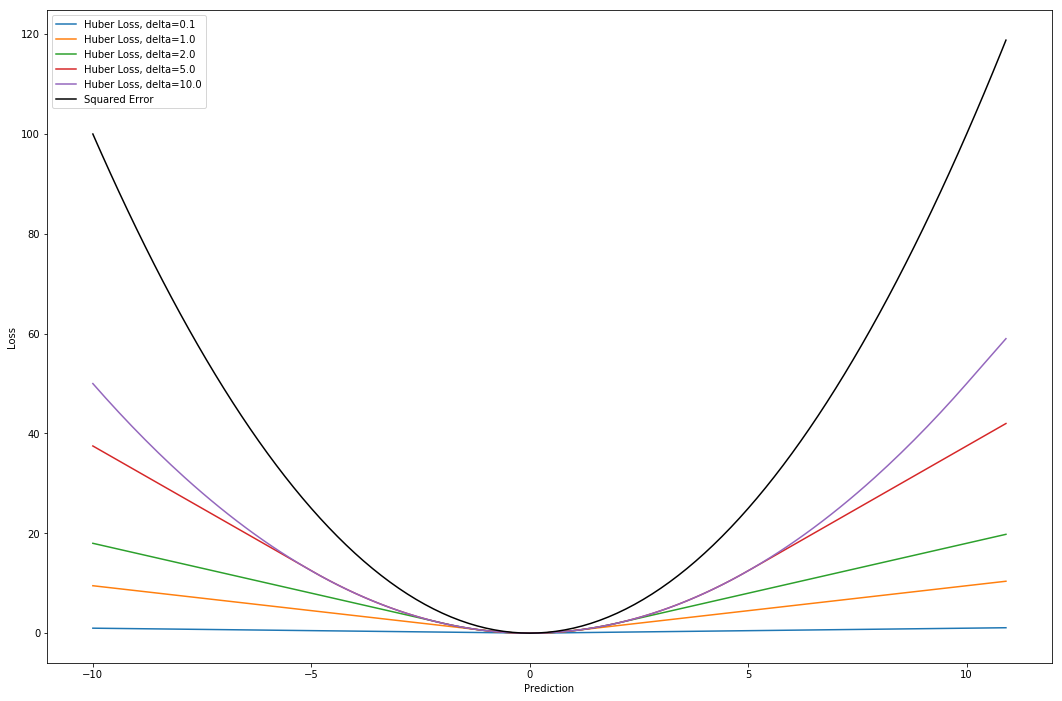

In [5]:
plt.figure(figsize=(18,12))
for delta in [0.1, 1., 2., 5., 10.]:
    plt.plot(y_pred, huber_loss_fn(delta), label='Huber Loss, delta={}'.format(delta))
plt.plot(y_pred, sqaured_loss_fn, c='k', label="Squared Error")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend()